In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import numpy as np
float_formatter = "{:2.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
from collections import Counter
from scipy.stats import f_oneway
import scikit_posthocs as sp
import scipy.stats as ss
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_excel("./data/azza_data/AMR.xlsx")

In [4]:
#df.describe()

In [5]:
part_1 = df[['scores','Degree']]

In [6]:
splits = []
for i in range(1,5):
    x = part_1.loc[part_1['Degree'] == i]
    x = x[['scores']]
    splits.append(x)

# RESULTS

In [7]:
array =[item.values for item in splits]
a, b, c, d = tuple(array)
s, pval = f_oneway(a, b, c, d)
print("Assuming Normal distribution .. Parametric ANOVA")
print('static P-value')
print(s, pval)


Assuming Normal distribution .. Parametric ANOVA
static P-value
[3.04] [0.03]


In [8]:
H, pval = ss.kruskal(a, b, c, d)
print("Not assuming Normal distribution .. Non-Parametric ANOVA")
print('static  P-value')
print("{:.3f}   {:.3f}".format(float(H), float(pval)))

Not assuming Normal distribution .. Non-Parametric ANOVA
static  P-value
8.267   0.041


Post-Hoc ANOVA
          1         2         3         4
1 -1.000000  0.017130  0.526673  0.126302
2  0.017130 -1.000000  0.014585  0.168235
3  0.526673  0.014585 -1.000000  0.175683
4  0.126302  0.168235  0.175683 -1.000000


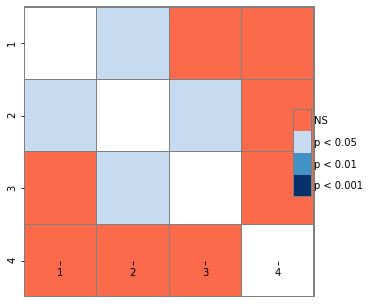

In [9]:
pc = sp.posthoc_conover(part_1, val_col='scores', group_col='Degree')
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
print("Post-Hoc ANOVA")
print(pc)


Post-Hoc ANOVA
          1         2         3         4
1 -1.000000  0.009089  0.535076  0.096966
2  0.009089 -1.000000  0.013543  0.190422
3  0.535076  0.013543 -1.000000  0.136714
4  0.096966  0.190422  0.136714 -1.000000


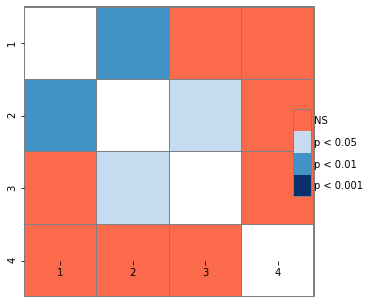

In [10]:
pc = sp.posthoc_ttest(part_1, val_col='scores', group_col='Degree')
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
print("Post-Hoc ANOVA")
print(pc)

# Linear Regression 

In [43]:
cols = list(df.columns)
cols = [item for item in cols if item != 'approach']
x_cols = [item for item in cols if item not in ['scores', 'USA', 'UK','Developing']]
y_cols = 'scores'
y_cols_logis = 'approach'
x_data = df[x_cols]
y_data_LR = df[y_cols]
y_data_LoR = df[y_cols_logis]

In [44]:
lr = sm.OLS(y_data_LR, x_data)
lr2 = lr.fit()
print(lr2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 scores   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              239.5
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                   2.01e-159
Time:                        12:07:16   Log-Likelihood:                         -1087.2
No. Observations:                 358   AIC:                                      2198.
Df Residuals:                     346   BIC:                                      2245.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Logistic Regression 

In [45]:
model = sm.Logit(y_data_LoR, x_data)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.561579
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               approach   No. Observations:                  358
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Dec 2019   Pseudo R-squ.:                  0.1883
Time:                        12:07:21   Log-Likelihood:                -201.05
converged:                       True   LL-Null:                       -247.69
Covariance Type:            nonrobust   LLR p-value:                 3.755e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Degree          0.5267      0.123      4.269      0.000       0.285       0.768
Years           0.1793    